# Variance-Bias Trade off

Every estimator has advantages and drawbacks. Its generalization error can be decompossed in terms of bias, variance, and noise. The bias of an estimator is its average error for different training sets. The variance of an estimator indicates how sensitive it is to varying training sets. Noise is a property of the data itself.

Bias and variance are inherent properties of estimators and we usually have to select learning algorithms and hyperparameters so that both bias and variance are as low as possible. Another way to reduce the variance of the model is to use more training data. However, you should only collect more training data if the true function is too complex to be approximated by an esimater with a lower variance.

Automatically created module for IPython interactive environment


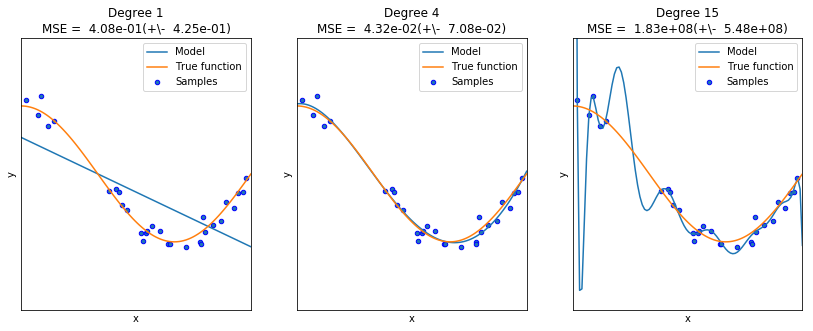

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return(np.cos(1.5 * np.pi * X))

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5));
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                            include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    #Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                           scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {: .2e}(+\- {: .2e})".format(
    degrees[i], -scores.mean(), scores.std()))

***


Importing usual libraries

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('whitegrid')

## Validation Curve
 - For identification of over- and under-fitting
 - Plotting training and validation scores vs. model parameters




### Validation Curve for Ridge Regression

In [24]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
iris = load_iris()
X, y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)

train_scores, valid_scores = validation_curve(Ridge(),
                                            X,
                                            y,
                                            param_name,
                                            param_range,
                                            scoring='r2')
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)


[[0.94141575 0.92944161 0.92267644]
 [0.94141575 0.92944161 0.92267644]
 [0.94141575 0.92944161 0.92267644]
 [0.94141574 0.92944161 0.92267643]
 [0.94141555 0.92944147 0.92267627]
 [0.94140905 0.92943672 0.92267062]
 [0.94122796 0.92929956 0.92250918]
 [0.93864928 0.92720953 0.9201652 ]
 [0.92516976 0.91623535 0.90866735]
 [0.87947046 0.87281594 0.86003406]]
[[0.90335828 0.92525982 0.94159335]
 [0.90335841 0.92525969 0.94159334]
 [0.90335923 0.92525892 0.94159327]
 [0.90336411 0.92525427 0.94159282]
 [0.90339309 0.9252264  0.94158999]
 [0.9035563  0.92505845 0.94156839]
 [0.90425122 0.92403578 0.94131162]
 [0.90492661 0.91834258 0.93850378]
 [0.89750235 0.89783134 0.92867312]
 [0.85024272 0.8334692  0.90023046]]


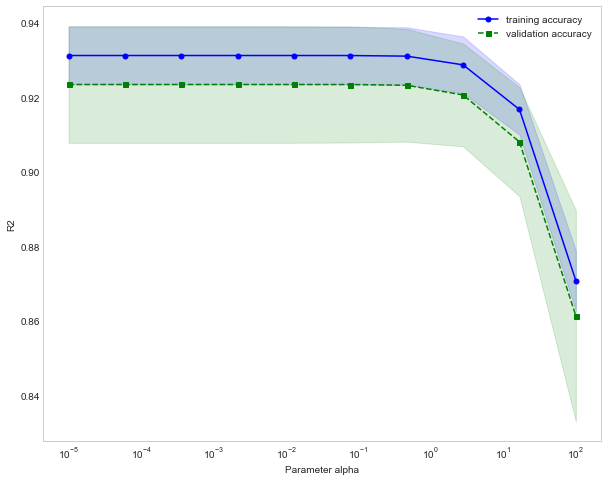

In [30]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                train_mean - train_std, alpha=0.15,
                color='blue')
plt.plot(param_range, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='upper right')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')
plt.show()

So with an alpha penalization of <= 0.1, the model is consistant. The other direction, the R2 drops off rather quickly

### Plotting Validation Curve

In this plot you can see the training scores and validation scores of an SVM for different values of the kernal parameter gamma. For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. Medium values of gamme will result in high values for both scores, i.e. the classifier is performing fairly well. If gamme is too high, the classifier will overfit, which means that the training score is good, but the validation score is poor.

In [33]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import  validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)
train_scores, test_scores = validation_curve(SVC(),
                                             X,
                                             y,
                                             param_name="gamma",
                                             param_range=param_range,
                                             cv=10,
                                             scoring="accuracy",
                                             n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Automatically created module for IPython interactive environment


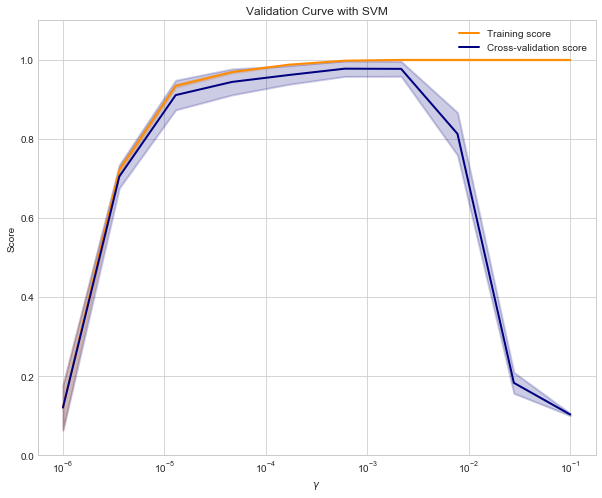

In [42]:
plt.figure(figsize=(10, 8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color='darkorange', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
            color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

At a $\gamma$ < $10^{-5}$ the model is underfit, from $10^{-5}$ to ~ $10^{-2.5}$ it looks good, and past here is is overfit.

***